In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.cluster import KMeans

In [19]:
df = pd.read_csv('iris.csv')
df.head()
df = df.drop(labels=['Species'],axis=1)

In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [21]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [23]:
kmodel= KMeans(n_clusters=3 , n_jobs=-1 )
kmodel.fit(dataFrame)

C:\Users\Anikat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [36]:

SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(dataFrame)
    SSE.append(kmeans.inertia_)



In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
frame = pd.DataFrame({'Cluster':range(1,20) ,
                      'SSE':SSE})

Text(0, 0.5, 'Inertia')

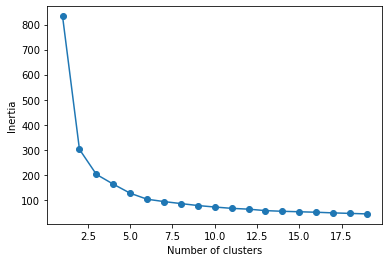

In [38]:
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [47]:
kmodel = KMeans(n_clusters=3)
kmodel.fit(dataFrame)
pred = kmodel.predict(dataFrame)

In [48]:
from collections import Counter

In [49]:
frame = pd.DataFrame(dataFrame)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    53
0    50
2    47
Name: cluster, dtype: int64

In [50]:
y_kmeans = kmeans.fit_predict(dataFrame)

In [51]:
x = dataFrame.iloc[:, [0, 1, 2, 3]].values

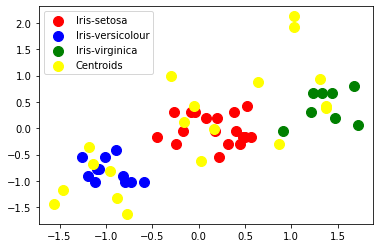

In [54]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()